In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


Create the training data set, where xn represents a variable distributed
in a mesh in the range (0,1) and tn is given by sin(2πxn) + ξn where ξn is distributed normally with zero mean and standard deviation σ = 0.3. Let us consider that the set has N = 10 points.

Create, also, a test data set formed by N points xn distributed with a uniform random distribution in the range (0,1). Again, store the set or create it in such a way that you may recover,
exactly, the same elements whenever you want.

In [1]:
def E_RMS(N: int, t, y):
    sq_error = [(yn - tn)**2 for yn, tn in zip(y, t)]
    return np.sqrt(np.mean(sq_error))


In [130]:

def pfit(N, plot = True):
    np.random.seed(seed = 20231)

    x_train = np.arange(0,1,1/N)
    t = [np.sin(2*np.pi*xn) + np.random.normal(0, 0.3) for xn in x_train]

    x_test = np.random.uniform(0, 1, N)
    y = [np.sin(2*np.pi*xn)+ np.random.normal(0, 0.3) for xn in x_test]

    x_show = np.arange(0, 1, 0.001) # For plotting the sinus curve
    y_show = [np.sin(2*np.pi*xn) for xn in x_show]

    degrees = list([0, 1, 3] + [N-1]) # Degrees of polynomials to be evaluated

    # Generate polynomial from training data
    pfits = [np.polyfit(x_train, t, deg=d) for d in range(0,101)]
    
    # Evaluate polynomial on x_show
    y_fits = [np.polyval(p, x_show) for p in pfits]
    train_fits = [np.polyval(p, x_train) for p in pfits]
    test_fits = [np.polyval(p, x_test) for p in pfits]

    errors = {}
    errors['Train'] = [E_RMS(N, t, t_hat) for t_hat in train_fits]
    errors['Test'] = [E_RMS(N, y, y_hat) for y_hat in test_fits]
    if plot:
    # Plot data and fitted curve
        [plt.plot(x_show, fitted, label=f'M={str(deg)}') for deg, fitted in zip(degrees, y_fits)]
        plt.scatter(x_train, t, label='Training data', s=14)
        plt.scatter(x_test, y, label='Testing data', s=10)

        plt.plot(x_show, y_show, label="$sin(2\pi x)$")

        plt.title("Polynomial approximation of noisy training data")
        plt.legend()
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.grid()
        plt.show()

    return errors


Show the ERMS obtained as a function of M for the training and the test data sets in a
single graph. Comment the results.

In [131]:
errors_100 = pfit(100, False)

/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_13007/880586258.py:16: RankWarning: Polyfit may be poorly conditioned
  pfits = [np.polyfit(x_train, t, deg=d) for d in range(0,101)]
/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_13007/880586258.py:16: RankWarning: Polyfit may be poorly conditioned
  pfits = [np.polyfit(x_train, t, deg=d) for d in range(0,101)]
/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_13007/880586258.py:16: RankWarning: Polyfit may be poorly conditioned
  pfits = [np.polyfit(x_train, t, deg=d) for d in range(0,101)]
/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_13007/880586258.py:16: RankWarning: Polyfit may be poorly conditioned
  pfits = [np.polyfit(x_train, t, deg=d) for d in range(0,101)]
/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_13007/880586258.py:16: RankWarning: Polyfit may be poorly conditioned
  pfits = [np.polyfit(x_train, t, deg=d) for d in range(0,101)]
/var/folders/h8/b971bz894tn3xsv5xd6

/var/folders/h8/b971bz894tn3xsv5xd65dq2c0000gn/T/ipykernel_13007/615754692.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,10))


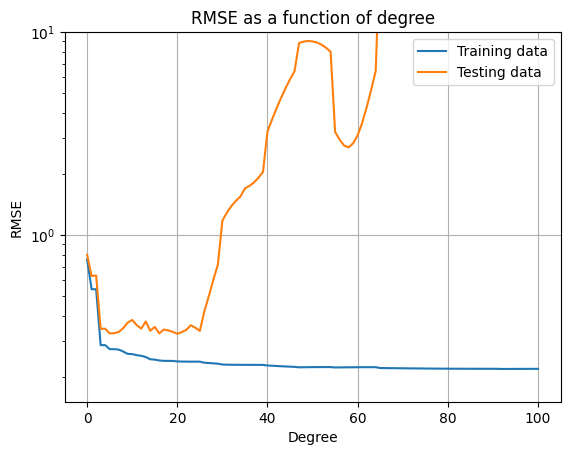

In [136]:

plt.semilogy(errors_100['Train'], label="Training data")
plt.semilogy(errors_100['Test'], label="Testing data")
plt.grid()
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.legend()
plt.ylim((0,10))
plt.title("RMSE as a function of degree")
plt.show()

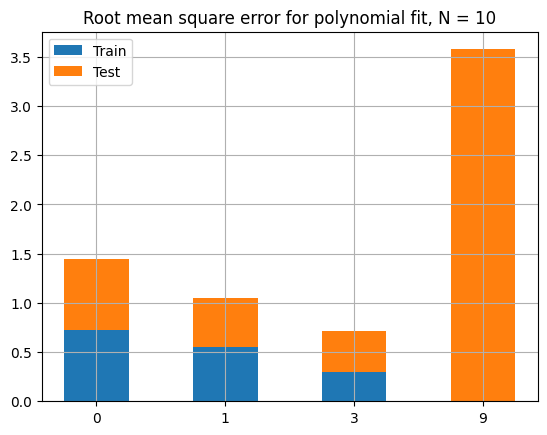

In [102]:
width = 0.5
N=10
degrees = [0,1,3,N-1]
degree_labels = [str(deg) for deg in degrees]
fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, errors in errors_10.items():
    p = ax.bar(degree_labels, errors, width, label=boolean, bottom=bottom)
    bottom += errors

ax.set_title("Root mean square error for polynomial fit, N = 10")
ax.legend(loc="upper left")
ax.grid()

plt.show()

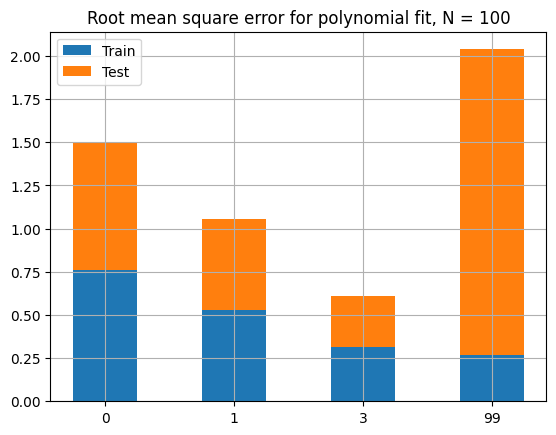

In [103]:
width = 0.5
N=100
degrees = [0,1,3,N-1]
degree_labels = [str(deg) for deg in degrees]
fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, errors in errors_100.items():
    p = ax.bar(degree_labels, errors, width, label=boolean, bottom=bottom)
    bottom += errors

ax.set_title(f"Root mean square error for polynomial fit, N = {100}")
ax.legend(loc="upper left")
ax.grid()

plt.show()

<h1>MULTILAYERED PERCEPTRON NETWORK</h1>

In [11]:
import numpy as np

N=100
np.random.seed(seed = 20231)

x_train = np.arange(0,1,1/N).reshape(-1, 1)
t = [np.sin(2*np.pi*xn) + np.random.normal(0, 0.3) for xn in x_train]

In [19]:
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        
        # Initialize weights and biases
        sizes = [input_size] + hidden_sizes + [output_size]
        self.weights = [np.random.randn(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
        self.biases = [np.random.randn(1, sizes[i+1]) for i in range(len(sizes)-1)]
        
    def forward(self, X):
        a = [X]
        for i in range(len(self.weights)):
            z_i = np.dot(a[-1], self.weights[i]) + self.biases[i]
            a_i = 1 / (1 + np.exp(-z_i))
            a.append(a_i)
        return a[-1]
    
    def backward(self, X, y):
        # Forward propagation
        a = [X]
        for i in range(len(self.weights)):
            z_i = np.dot(a[-1], self.weights[i]) + self.biases[i]
            a_i = 1 / (1 + np.exp(-z_i))
            a.append(a_i)
        
        # Backward propagation
        delta = [2 * (a[-1] - y) * a[-1] * (1 - a[-1])]
        for i in reversed(range(len(self.weights))):
            delta_i = np.dot(delta[-1], self.weights[i].T) * a[i+1] * (1 - a[i+1])
            delta.append(delta_i)
        delta.reverse()
        
        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * np.dot(a[i].T, delta[i+1])
            self.biases[i] -= self.learning_rate * np.sum(delta[i+1], axis=0)
    
    def fit(self, X, y, epochs=100, learning_rate=0.1):
        self.learning_rate = learning_rate
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                # Forward propagation
                y_pred = self.forward(X[i])
                
                # Backward propagation
                self.backward(X[i], y[i])
                
    def predict(self, X):
        return self.forward(X)

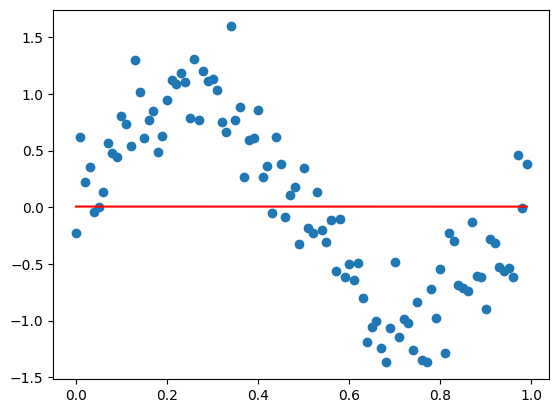

In [20]:
# Create and train the MLP
mlp = MLP(1, [10, 10, 10, 10], 1)
mlp.fit(x_train, t, epochs = 100, learning_rate=0.5)

# Make predictions and plot the results
y_pred = mlp.predict(x_train)
import matplotlib.pyplot as plt
plt.scatter(x_train, t)
plt.plot(x_train, y_pred, color='red')
plt.show()